## Problem 3 Semantic Segmentation

#### 1. Please complete the FCN network, the fcn8s in ptsemseg/models/fcn.py. And briefly describe the model structure.

The model structure of the FCN network is an adapted version of contemporary classification networks (AlexNet, VGGnet, and GoogleLeNet). The biggest difference is that the FCN network transforms fully connected layers into convolution layers to enables a classification net to output a heatmap.

#### 2. Do we use weights from a pre-trained model, or do we train the model from scratch?

We use weights from a pre-trained model.

#### 3. Please train the network with CityScape dataset. Visualize the training curves (suggested option: use Tensorboard). Include pictures of the training and validation curve. (config file: configs/fcn8s cityscapes.yml)

Smoothing option: 0.6
Train Loss


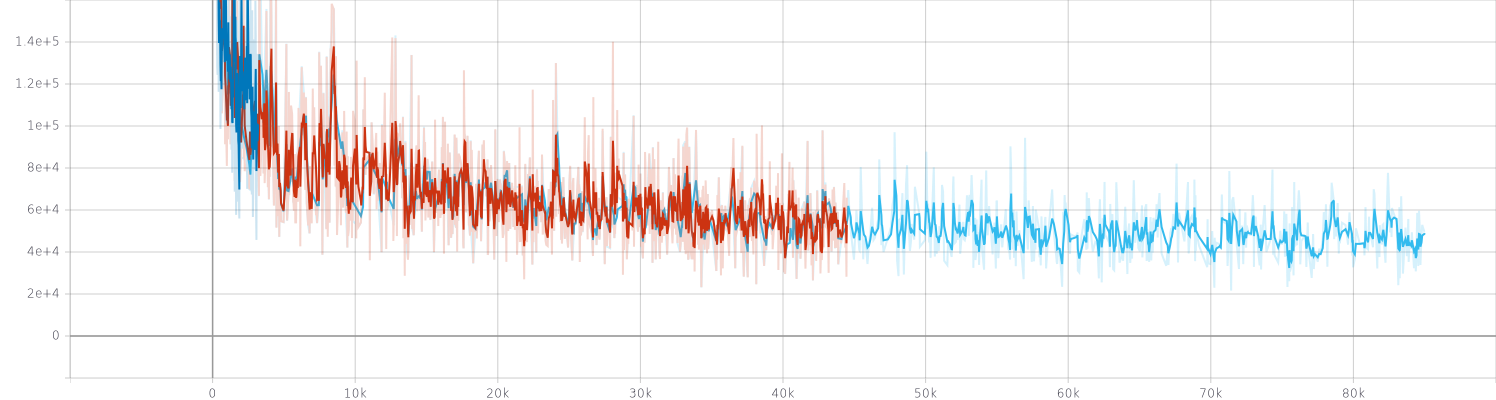

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image
print('Smoothing option: 0.6')

print('Train Loss')
Image(filename='loss_train_loss.png')

Validation Loss


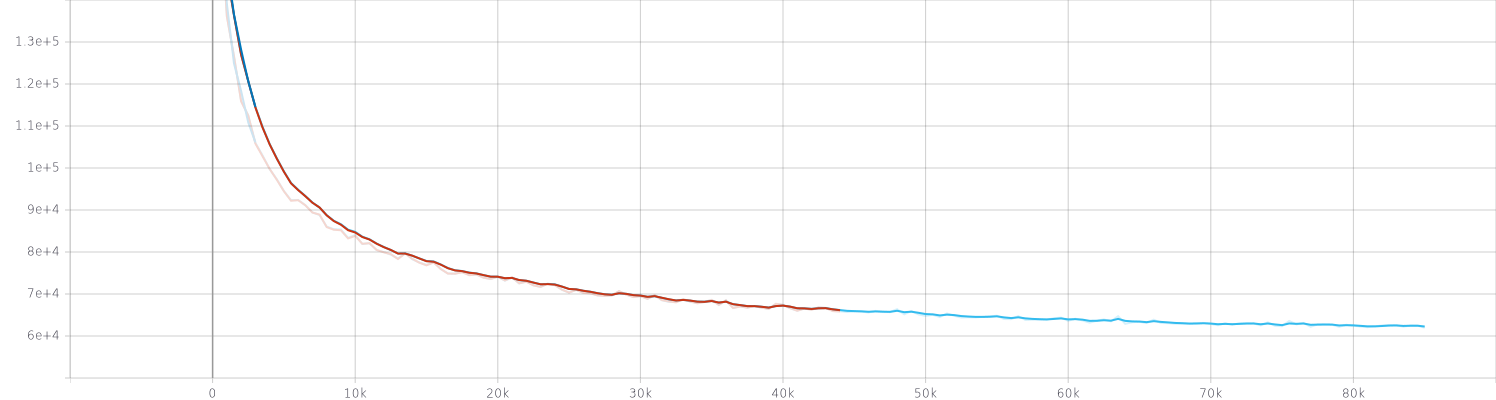

In [2]:
print('Validation Loss')
Image(filename='loss_val_loss.png')

#### 4. What are the metrics used by the original paper? Do inference (validate.py) on the validation set. Which classes work well? Which classes do not?

In the original paper, four metrics are used, from common semantic segmentation and scene parsing evaluations that are variations on pixel accuracy and region intersection over union (IU).
(1) Pixel accuracy
(2) Mean accuraccy
(3) Mean IU
(4) Frequency weighted IU

After I have done inference on the validation set, the results show that:<br>
Overall Acc:     0.9138093907339252<br>
Mean Acc :       0.6298012986706563<br>
FreqW Acc :      0.8500319923488628<br>
Mean IoU :       0.5402348792203615<br>
0 0.9558736510351731<br>
1 0.6894731516414768<br>
2 0.8476814943012164<br>
3 0.4516312005922954<br>
4 0.36278140576596535<br>
5 0.24644488698482836<br>
6 0.30463070660075603<br>
7 0.3998039949889285<br>
8 0.8592388631517343<br>
9 0.5150722434460996<br>
10 0.8868455279194901<br>
11 0.5453481591031861<br>
12 0.23404801469892866<br>
13 0.8524843100675146<br>
14 0.5273036959672814<br>
15 0.4659593564836171<br>
16 0.3401910673861355<br>
17 0.22536395858782066<br>
18 0.554287016464422<br>

I think class 0(road), 2(building), 8(vegetation), 10(sky), 13(car) work well.

I think class 5(pole), 12(rider), 17(motorcycle), do not work well.

#### 5. Can you visualize your results, by plotting out the labels and predictions of the images? Please include at least two examples (HINT: check the unit test in ptsemseg/loader/cityscapes loader.py)

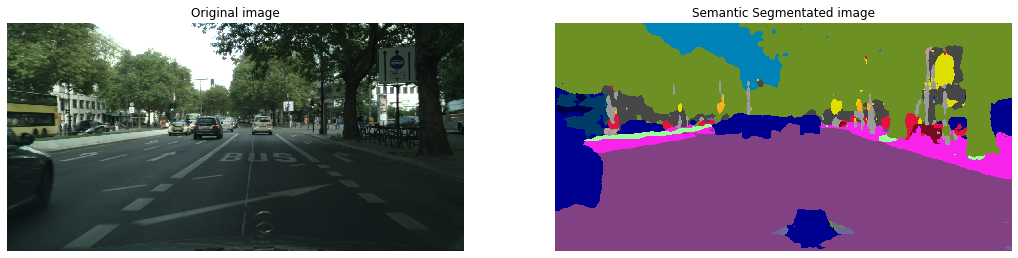

In [3]:
test0 = plt.imread('berlin_000000_000019_leftImg8bit.png')
seg0 = plt.imread('test_results/000_seg.png')

plt.figure(figsize=(18,10))
plt.subplot(121)
plt.imshow(test0)
plt.title('Original image')
plt.axis('off')

plt.subplot(122)
plt.imshow(seg0)
plt.title('Semantic Segmentated image')
plt.axis('off')

plt.show()

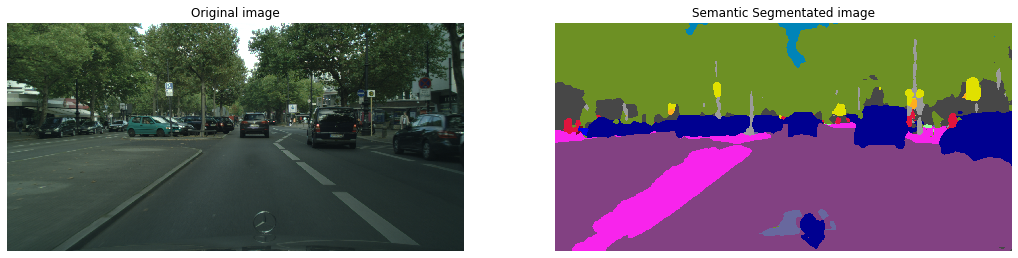

In [4]:
test1 = plt.imread('berlin_000001_000019_leftImg8bit.png')
seg1 = plt.imread('test_results/001_seg.png')

plt.figure(figsize=(18,10))
plt.subplot(121)
plt.imshow(test1)
plt.title('Original image')
plt.axis('off')

plt.subplot(122)
plt.imshow(seg1)
plt.title('Semantic Segmentated image')
plt.axis('off')

plt.show()

#### 6. Please take a photo of a nearby city street, and show the output image from the model. Does the output image look reasonable?

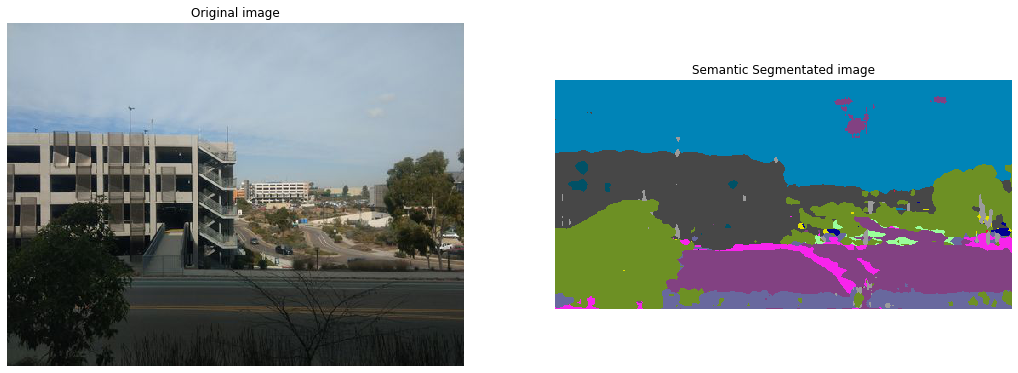

In [5]:
test2 = plt.imread('test.jpg')
seg2 = plt.imread('test_results/002_seg.png')

plt.figure(figsize=(18,10))
plt.subplot(121)
plt.imshow(test2)
plt.title('Original image')
plt.axis('off')

plt.subplot(122)
plt.imshow(seg2)
plt.title('Semantic Segmentated image')
plt.axis('off')

plt.show()

Yes, I think the result looks reasonable. The sky, buildings, roads, and vegetation are classified correctly. 

#### 7. Based on your analysis of the model and training, how can you get better results for prediction? (Give 2 possible options. Change the parameters? Change the network architecture? Or other thoughts? You can checkout the FCN paper [1] and the followup works.)

Change the parameters. In this case, the weights are taken from the pre-trained VGG model. If we use the weights from others pre-trained model or train the model from scratch, the results may change.

In the FCN paper, it mensions that "refining fully convolutional nets by fusing information from layers with different strides improves segmentation detail."